# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.



<div class="alert alert-block alert-warning">
<b>Caution:</b> You will need to create the proper python virtual environment.  The environment specifications can be found in the requirements.txt file.
<br>
Using Anaconda is recommended.  To begin, execute the code below from your anaconda command prompt:<br>
<br>
$ conda env create -f environment.yaml
<br>
<br>
Then navigate to the directory for this project where you downloaded it on your PC and launch jupyter notebook from there.
</div>

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

<div class="alert alert-block alert-info">
<b>Decision Point:</b> <br>
<br>
Before running the below cell, you must make a decision on whether to run the program with one agent, or an alternate version with twenty agents.  For purposes of experimentation (tuning hyperparameters, etc.) during training, I was originally planning to focus on the single agent version, assuming it would be faster to train and iterate with.  However, I later found that the twenty agent version trained just as quickly.  For the final version of the program, I have used the twenty agent version.
<br>
<br>
Whichever version (single or multiple agents) you choose, be sure that the below cell and the cell in section 9 of this program correspond accordingly.  If you are just curious about the implementation of the program and wish to see how the smart agent works, please proceed with the twenty agent version which is currently set up as the default.

</div>

In [2]:
# loading environment for one agent

# env = UnityEnvironment(file_name='Reacher_Windows_x86_64/Reacher.exe')

# loading environment for multiple agents

env = UnityEnvironment(file_name='Reacher_Windows_x86_64-multi/Reacher.exe')


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

<div class="alert alert-block alert-warning">
<b>Caution:</b> The demonstration of a random agent can be helpful in seeing the contrast presented by the smart agent.  However, running this step will take a bit of time so if you are only interested in seeing the smart agent and/or the code involved in creating it, it may be better to skip this step.
</div>

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if rewards[0] != 0.0:
        print(rewards)
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.0


### 4. Building our Actor and Critic Networks using Pytorch

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [6]:
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

The below 'Actor' class builds an actor (policy) network that will map states to actions. Note the use of relu activation functions and batch normalization.

In [7]:
class Actor(nn.Module):
    
    def __init__(self, state_size, action_size, seed, fc1_units = 400, fc2_units = 300):    
        
        # initializing model parameters
        
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.bn1 = nn.BatchNorm1d(fc1_units)
        self.bn2 = nn.BatchNorm1d(fc2_units)
        self.reset_parameters()
        
    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        
    def forward(self, state):
        x = self.bn1(F.relu(self.fc1(state)))
        x = self.bn2(F.relu(self.fc2(x)))
        return F.tanh(self.fc3(x))

The below 'Critic' class builds a critic (value) network that maps state,action pairs to Q-values

In [8]:
class Critic(nn.Module):
    
    def __init__(self, state_size, action_size, seed, fcs1_units = 400, fc2_units = 300, fc3_units = 256, fc4_units = 256):    
        
        # initializing model parameters
        
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units + action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, 1)
        self.bn1 = nn.BatchNorm1d(fcs1_units)
        self.reset_parameters()
        
    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)
        
    def forward(self, state, action):
        xs = F.relu(self.fcs1(state))
        xs = self.bn1(xs)
        x = torch.cat((xs, action), dim = 1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

<div class="alert alert-block alert-info">
<b>Insights from model architectures:</b> <br>
<br>
Model architectures were important in the successful training of the agent, but were not the top driving factors in its success.  I tried multiple architectures with both a differing number of layers and differing numbers of hidden nodes per layer.  In the end, a two layer architecture worked well for both the actor and critic models.  The critic model appeared to be amenable to more complex designs (3+ layers), while any additional complexity added to the actor model resulted in disaster.  Batch normalization also appeared to help the agents train, but was less important compared to the tuning of other hyperparameters.
</div>

### 5. Creating a Noise Class to encourage exploration 

In [9]:
class Noise:
    
    def __init__(self, size, seed, mu = 0., theta = 0.15, sigma = 0.2, dt = 1):
        
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.dt = dt
        self.size = size
        self.reset()
        
    def reset(self):
        
        # reset the noise to mean mu
        
        self.state = copy.copy(self.mu)
        
    def sample(self):
        
        x = self.state
        #dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for i in range(len(x))])
        dx = self.theta * (self.mu - x) * self.dt + self.sigma * np.sqrt(self.dt) * np.array([np.random.randn() for i in range(len(x))])
        self.state = x + dx
        return self.state

<div class="alert alert-block alert-info">
<b>Insights from noise:</b> <br>
<br>
The initial DDPG implementation applied the random.random function instead of the np.random.randn function now used.  This was a problem given that random.random drew from a uniform distribution which significantly skewed the noise in one direction.  The np.random.rand function draws from a gaussian distribution which eliminates this skew.  Another learning was to keep the values of dt in the class to 1 (or exclude alltogether).  In other DDPG github implementations involving other environments, dt was used with a small value (~1e-2) which suppresses the noise.  While that may be helpful in other environments, it was detrimental here.

</div>

### 6. Building a Replay Buffer for our Agent

In [10]:
# Hyperparameters specific to prioritized replay

PRIO_REPLAY_ALPHA = 0.60
BETA_START = 0.4
BETA_FRAMES = 100000
t = 0

In [11]:
from collections import namedtuple, deque

class ReplayBuffer:
    
    def __init__(self, action_size, buffer_size, batch_size, seed):
        
        # initialize parameters
        
        self.action_size = action_size
        self.memory = deque(maxlen = buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names = ["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        
    def add(self, state, action, reward, next_state, done):
        
        # add a new experience to memory
        
        e = self.experience(state, action, reward, next_state, done)
        #print(len(e))
        self.memory.append(e)
        
    def sample(self):
        
        # randomly sample a batch of experiences from memory
        
        experiences = random.sample(self.memory, k = self.batch_size)
        
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        
        return len(self.memory)
    
class PrioReplayBuffer:
    
    def __init__(self, action_size, buffer_size, batch_size, seed, prob_alpha = PRIO_REPLAY_ALPHA):
        self.action_size = action_size
        self.memory = deque(maxlen = buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names = ["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.priorities = np.zeros((buffer_size,), dtype = np.float32)
        self.pos = 0
        self.prob_alpha = prob_alpha
        self.buffer_size = buffer_size
        
    def add(self, state, action, reward, next_state, done):
        
        max_prio = self.priorities.max() if self.memory else 1.0
        
        # adding a new experience to memory
        
        e = self.experience(state, action, reward, next_state, done)
        if len(self.memory) < self.buffer_size:
            self.memory.append(e)
        else:
            self.memory[self.pos] = e
        self.priorities[self.pos] = max_prio
        self.pos = (self.pos + 1) % self.buffer_size
    
    def sample(self, beta = 0.4):
        
        if len(self.memory) == self.buffer_size:
            prios = self.priorities
        else:
            prios = self.priorities[:self.pos]
        probs = prios ** self.prob_alpha
        
        probs /= probs.sum()
        indices = np.random.choice(len(self.memory), self.batch_size, p = probs)
        experiences = [self.memory[idx] for idx in indices]
        total = len(self.memory)
        weights = (total * probs[indices]) ** (-beta)
        weights /= weights.max()
        
        # randomly sampling a batch of experiences from memory
        
        # experiences = random.sample(self.memory, k = self.batch_size)
        
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones), indices, np.array(weights, dtype = np.float32)
    
    def __len__(self):
        
        # return the current size of memory
        
        return len(self.memory)    
    
    def update_priorities(self, batch_indices, batch_priorities):
        
        for idx, prio in zip(batch_indices, batch_priorities):
            self.priorities[idx] = prio

<div class="alert alert-block alert-info">
<b>Insights from replay buffer designs:</b> <br>
<br>
The cell above contains classes for both a random and a prioritized replay buffer design.  For the single agent class in section 8, there are options to use either buffer.  While prioritized replay appeared to be slightly helpful for the single agent, it did not result in a huge improvement, so I left it out of the multiple agent class to favor model parsimony.  The multiple agent class does function differently in that the agents share the same replay buffer versus each having its own buffer.

</div>

### 7. Initializing Hyperparameters

In [12]:
BUFFER_SIZE = int(100000)                                                          # replay buffer size
BATCH_SIZE = 200                                                                   # minibatch size
GAMMA = 1.0                                                                        # discount factor
TAU = 0.001                                                                        # for soft update of target parameters
LR_ACTOR = 0.0001                                                                  # learning rate of the actor
LR_CRITIC = 0.0001                                                                 # learning rate of the critic
WEIGHT_DECAY = 0.000001                                                            # L2 weight decay
LEARN_EVERY_T = 4                                                                  # num time steps between each net update
LR_DECAY = 1.0                                                                     # learning rate decay factor
NB_AGENTS = 20                                                                     # number of agents

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

<div class="alert alert-block alert-info">
<b>Insights from hyperparameters:</b> <br>
<br>
<b>Batch size -</b> differing batch sizes did not result in significant changes in performance 
<br>
<b>Gamma -</b>  The discount factor for future rewards.  Differing values of gamma between 0.99 and 1.0 did not change performance.  The instructions for the multiple agent scenario stated that discounting rewards were not to be used, so I left the value at 1.0.
<br>
<b>TAU -</b>  Tau is used for the soft update of the target model parameters from the current model parameters.  Most implementations favor a value of 0.001 which was used in the end.  I ran an experiment by increasing the value of tau by a factor of 10, but this caused a signficant decline in performance.
<br>
<b>Learning rates -</b>  The learning rate of the actor did not change performance much when varied.  In contrast, the learning rate of the critic proved to be one of the two top drivers for performance.  Successful training did occur at a value of 0.001 (commonly used in DDPG implementations), but it took much longer.  Lowering the critic learning rate to 0.0001 significantly improved training speed.
<br>
<b>Weight decay -</b>  Used for regularization.  This was the second of the two top drivers of performance.  The agent was very sensitive to any values of weight decay above 0.00001.  Lowering the values by another power of 10 allows the agent to train successfully.
<br>
<b>LR decay -</b>  To be used to dynamically decay learning rates over time.  This was not used in the final agent but I built in the option early on.


</div>

### 8. Building the Agents

<div class="alert alert-block alert-warning">
<b>Caution:</b> There are two versions of the agent.  'Agent' creates the agent under the single agent scenario while 'Agent_Multi' creates agents under the multiple agents scenario.  The multi agent version needed to be created seperately due to multiple agents sharing a single replay buffer under the multiple agents scenario, which in turn requires the replay buffer to be outside of the 'Agent' class.
</div>

In [13]:
class Agent():
    
    def __init__(self, state_size, action_size, random_seed, LR_ACTOR = LR_ACTOR, LR_CRITIC = LR_CRITIC, LR_DECAY = LR_DECAY,
                beta = BETA_START, prio = False, buffer_size = BUFFER_SIZE, nb_agents = NB_AGENTS):
        
        # initializing parameters
        
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.agent_score = []
        self.lr_actor = LR_ACTOR
        self.lr_critic = LR_CRITIC
        self.lr_decay = LR_DECAY
        self.nb_agents = NB_AGENTS
        
        # initializing models from step 4
        
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr = LR_ACTOR)
        
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr = LR_CRITIC, weight_decay = WEIGHT_DECAY)
        
        # initializing noise and replay buffer from steps 5 and 6
        
        self.noise = Noise(action_size, random_seed)
        if prio == False:
            self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        else:
            self.memory = PrioReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)

        self.beta = beta # specific to prioritized replay
        self.prio = prio # specific to prioritized replay
        self.buffer_size = buffer_size
        
        self.critic_losses_v = 100000
        self.critic_loss = 100000
        self.actor_loss = 100000
        
    def add(self, states, actions, rewards, next_states, dones):
        
        # save experience in replay memory, and use random sample from buffer to learn
        if self.nb_agents >1:
            iter_obj = zip(states, actions, rewards, next_states, dones)
            for state, action, reward, next_state, done in iter_obj:
                self.memory.add(state, action, reward, next_state, done)
        else:
            self.memory.add(state, action, reward, next_state, done)
            
    def step(self, gamma, beta):
    
        # learn if enough samples are available in memory
        
        if len(self.memory) > BATCH_SIZE:
            if self.prio == False:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)
            elif self.prio == True:
                
                # the code under this 'else' statement performs the same operations as those under the 'learn' function, but
                    # using the priority replay buffer versus the standard replay buffer
                
                experiences, batch_indices, batch_weights = self.memory.sample(beta)
                states, actions, rewards, next_states, dones = experiences
                batch_weights_v = torch.tensor(batch_weights).to(device)
                actions_next = self.actor_target(next_states)
                Q_targets_next = self.critic_target(next_states, actions_next)
                Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
                Q_expected = self.critic_local(states, actions)
                self.critic_losses_v = batch_weights_v * (Q_expected - Q_targets) ** 2
                sample_prios_v = self.critic_losses_v + 1e-5 
                self.critic_losses_v = self.critic_losses_v.mean()
                sample_prios_v = sample_prios_v[0]
                self.critic_optimizer.zero_grad()
                self.critic_losses_v.backward()
                torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
                self.critic_optimizer.step()
                
                # resuming normal operations under the learn function
                
                ###### update the actor ######
        
                # compute actor loss

                actions_pred = self.actor_local(states)
                self.actor_loss = -self.critic_local(states, actions_pred).mean()

                # minimize the loss

                self.actor_optimizer.zero_grad()
                self.actor_loss.backward()
                self.actor_optimizer.step()

                ###### option to decay learning rates (not used in final solution) ######

                self.lr_actor *= self.lr_decay
                self.lr_critic *= self.lr_decay

                ###### update target networks ######

                self.soft_update(self.critic_local, self.critic_target, TAU)
                self.soft_update(self.actor_local, self.actor_target, TAU)
                
                ###### update priorities of replay buffer experiences #####
                
                self.memory.update_priorities(batch_indices, sample_prios_v.data.cpu().numpy())

            
    def act(self, state, add_noise = True):
        
        # returns actions for given state as per current policy
        
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)
    
    def reset(self):
        self.noise.reset()
        
    def learn(self, experiences, gamma):
        
        states, actions, rewards, next_states, dones = experiences
        
        ###### update the critic ######
        
        # get predicted next state actions and Q values from target models
        
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)

        # compute Q targets for current states
        
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # compute critic loss
        
        Q_expected = self.critic_local(states, actions)
        self.critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        # minimize the loss
        
        self.critic_optimizer.zero_grad()
        self.critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        
        ###### update the actor ######
        
        # compute actor loss
        
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        
        # minimize the loss
        
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        ###### option to decay learning rates (not used in final solution) ######
        
        self.lr_actor *= self.lr_decay
        self.lr_critic *= self.lr_decay
        
        ###### update target networks ######
        
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)
        
    def soft_update(self, local_model, target_model, tau):
        
        # soft update model parameters from local to target
        
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.detach_() # added code
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)

In [14]:
memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed = 1)
    # this creates the replay buffer - in the multiple agent scenario, all agents share this same replay buffer

class Agent_Multi():
    
    def __init__(self, state_size, action_size, random_seed, LR_ACTOR = LR_ACTOR, LR_CRITIC = LR_CRITIC, LR_DECAY = LR_DECAY,
                beta = BETA_START, prio = False, buffer_size = BUFFER_SIZE, nb_agents = NB_AGENTS, memory = memory):
        
        # initializing parameters
        
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.agent_score = []
        self.lr_actor = LR_ACTOR
        self.lr_critic = LR_CRITIC
        self.lr_decay = LR_DECAY
        self.nb_agents = NB_AGENTS
        
        # initializing models from step 4
        
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr = LR_ACTOR)
        
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr = LR_CRITIC, weight_decay = WEIGHT_DECAY)
        
        # initializing noise from step 5
        
        self.noise = Noise(action_size, random_seed)
        
        self.beta = beta # specific to prioritized replay
        self.prio = prio # specific to prioritized replay
        self.buffer_size = buffer_size
        
        self.critic_losses_v = 100000
        self.critic_loss = 100000
        self.actor_loss = 100000
        
    def add(self, states, actions, rewards, next_states, dones):
        
        # save experience in replay memory, and use random sample from buffer to learn
        
        if self.nb_agents >1:
            iter_obj = zip(states, actions, rewards, next_states, dones)
            for state, action, reward, next_state, done in iter_obj:
                self.memory.add(state, action, reward, next_state, done)
        else:
            self.memory.add(state, action, reward, next_state, done)
            
    def step(self, gamma, beta):
    
        # learn if enough samples are available in memory
        
        if len(self.memory) > BATCH_SIZE:
            if self.prio == False:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)
            elif self.prio == True:
                
                # the code under this 'else' statement performs the same operations as those under the 'learn' function, but
                    # using the priority replay buffer versus the standard replay buffer
                    
                experiences, batch_indices, batch_weights = self.memory.sample(beta)

                states, actions, rewards, next_states, dones = experiences
                batch_weights_v = torch.tensor(batch_weights).to(device)
                actions_next = self.actor_target(next_states)
                Q_targets_next = self.critic_target(next_states, actions_next)
                Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
                Q_expected = self.critic_local(states, actions)
                self.critic_losses_v = batch_weights_v * (Q_expected - Q_targets) ** 2
                sample_prios_v = self.critic_losses_v + 1e-5 
                self.critic_losses_v = self.critic_losses_v.mean()
                sample_prios_v = sample_prios_v[0]
                self.critic_optimizer.zero_grad()
                self.critic_losses_v.backward()
                torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1)
                self.critic_optimizer.step()
                
                # resuming normal operations under the learn function
                
                ###### update the actor ######
        
                # compute actor loss

                actions_pred = self.actor_local(states)
                self.actor_loss = -self.critic_local(states, actions_pred).mean()

                # minimize the loss

                self.actor_optimizer.zero_grad()
                self.actor_loss.backward()
                self.actor_optimizer.step()

                ###### option to decay learning rates ######

                self.lr_actor *= self.lr_decay
                self.lr_critic *= self.lr_decay

                ###### update target networks ######

                self.soft_update(self.critic_local, self.critic_target, TAU)
                self.soft_update(self.actor_local, self.actor_target, TAU)
                
                ###### update priorities of replay buffer experiences #####
                
                self.memory.update_priorities(batch_indices, sample_prios_v.data.cpu().numpy())

            
    def act(self, state, add_noise = True):
        
        # returns actions for given state as per current policy
        
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        if add_noise:
            action += self.noise.sample()
        return np.clip(action, -1, 1)
    
    def reset(self):
        self.noise.reset()
        
    def learn(self, experiences, gamma):
        
        states, actions, rewards, next_states, dones = experiences
        
        ###### update the critic ######
        
        # get predicted next state actions and Q values from target models
        
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)

        # compute Q targets for current states
        
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))

        # compute critic loss
        
        Q_expected = self.critic_local(states, actions)
        self.critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        # minimize the loss
        
        self.critic_optimizer.zero_grad()
        self.critic_loss.backward()
        torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)
        self.critic_optimizer.step()
        
        ###### update the actor ######
        
        # compute actor loss
        
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        
        # minimize the loss
        
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        ###### option to decay learning rates (not used in final solution) ######
        
        self.lr_actor *= self.lr_decay
        self.lr_critic *= self.lr_decay
        
        ###### update target networks ######
        
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)
        
    def soft_update(self, local_model, target_model, tau):
        
        # soft update model parameters from local to target
        
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.detach_() # added code
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)    

<div class="alert alert-block alert-info">
<b>Insights about the learning algorithm:</b> <br>
<br>
Here I will be discussing the Agent_Multi() class. The agent proceeds along a repeating five stage process:
<br>
<br>
1) The environment is reset and the initial states are passed to the agents
<br>
2) The agents executes their 'act' functions, which take the states and passes them through the actor networks referenced in section 4 of this notebook.  The actor networks pass the states through two hidden layers of 400 and 300 nodes respectively which are followed by relu activation and batch normalization functions (the critic shares the same architecture).  The resulting output are four floating-point values between -1 and 1 which represent the agents' next actions.  Output from the noise function referenced in section 5 are added to these values to encourage exploration.
<br>
3) The environment takes in the agents' action outpust and returns values corresponding to the next states, rewards and expressions (labeled 'dones') indicating whether or not the current episode is over.  The agents then take in tuples consisting of the initial states, actions of the agents, rewards, next states and dones and feed these experience tuples to their 'add' functions, which in turn adds the experiences to the agents' shared replay buffer.
<br>
4) Every four time steps, the agents take a sample of their past experience tuples from their buffer and use the values in the tuples to update their actor and critic model parameters.  The agents accomplish this by executing their 'learn' functions, which update the loss values for both actor and critic networks of each agent, which are in turn backpropogated through the network via ADAM optimizer functions which update the weights for both models.
<br>
5) Finally, the values for the next states are set to be the values for the initial states and the algorithm repeats steps 2 through 5 until a given episode is complete and repeat steps 1 through 5 in subsequent episodes until the environment is considered solved.
<br>
<br>
Detailed explanations for the hyperparameters used by the algorithm are presented in section 7 of the notebook above.
</div>

### 9. Training the Agents

<div class="alert alert-block alert-warning">
<b>Caution:</b> Training takes a significant amount of time under either single or multiple agents scenarios.  To skip training and see the smart agent in action, skip section 9 and go directly to section 10.
<br>
<br>
<b>Caution:</b> The below cell runs the single agent version of training.  DO NOT RUN if you would like to proceed using the multiple agent scenario.
</div>


In [ ]:
state = env_info.vector_observations
state_size = states.shape[1]
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size
num_agents = 1
agent = Agent(state_size, action_size, random_seed = 1, prio = True, nb_agents = 1)

def ddpg_single(n_episodes = 1000, max_t = 10000, print_every = 100):  
    scores_deque = deque(maxlen = print_every)
    scores = []
    i = 0                                                                  # used for prioritized replay buffer
    beta = BETA_START                                                      # used for prioritized replay buffer
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]                  # reset the environment    
        state = env_info.vector_observations                               # get the current state (for each agent)
        episode_score = 0.                                                 # initialize/reset the episode score  
        
        for t in range(max_t):
            action = agent.act(state, add_noise = True)                    # agent selects its action
            env_info = env.step(action)[brain_name]                        # the action is passed to the environment
            next_state = env_info.vector_observations                      # get next state 
            reward = env_info.rewards                                      # get rewards
            done = env_info.local_done                                     # see if episode finished
            episode_score += reward[0]                                     # update the score 
            agent.add(state, action, reward[0], next_state, done)          # add next experience tuple to the buffer
            if t % LEARN_EVERY_T == 0:                                     # update model parameter during every 'LEARN_EVERY_T'
                agent.step(GAMMA, beta)                                           # timesteps
            state = next_state                                             # next state becomes the current state
            i += 1
            beta = min(1.0, BETA_START + i * (1.0 - BETA_START) / BETA_FRAMES)
            if done[0] == True:                                            # exit loop if episode finished
                break
        scores_deque.append(episode_score)
        scores.append(episode_score)
        if agent.prio == True:
            print('Episode Score {}: {:.2f} Loss Critic: {:.2E} Loss Actor: {:.2E}'.format(i_episode, episode_score, agent.critic_losses_v, agent.actor_loss))
        else:
            print('Episode Score {}: {:.2f} Loss Critic: {:.2E} Loss Actor: {:.2E}'.format(i_episode, episode_score, agent.critic_loss, agent.actor_loss))

        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 30:                                    # save models and break if environment solved
            print('Environment Solved in ', i_episode, ' episodes.')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores

scores = ddpg_single()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

<div class="alert alert-block alert-warning">
<b>Caution:</b> The below cell runs the multiple agent version of training.  DO NOT RUN if you would like to proceed using the single agent scenario.
</div>

C:\Users\steph\Anaconda3-1\envs\DRL\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\steph\Anaconda3-1\envs\DRL\lib\site-packages\ipykernel_launcher.py:154: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


Total score (averaged over agents) this episode1: 0.77949998257682
Total score (averaged over agents) this episode2: 0.8284999814815849
Total score (averaged over agents) this episode3: 1.3309999702498307
Total score (averaged over agents) this episode4: 1.4674999671988134
Total score (averaged over agents) this episode5: 1.001499977614734
Total score (averaged over agents) this episode6: 1.3229999704286466
Total score (averaged over agents) this episode7: 1.729999961331479
Total score (averaged over agents) this episode8: 1.6674999627284686
Total score (averaged over agents) this episode9: 1.7719999603927075
Total score (averaged over agents) this episode10: 2.113999952748412
Total score (averaged over agents) this episode11: 2.099499953072507
Total score (averaged over agents) this episode12: 2.244999949820331
Total score (averaged over agents) this episode13: 2.048999954201271
Total score (averaged over agents) this episode14: 1.8524999585933943
Total score (averaged over agents) th

Total score (averaged over agents) this episode119: 26.442499408964085
Total score (averaged over agents) this episode120: 23.81549946768207
Total score (averaged over agents) this episode121: 25.359999433159775
Total score (averaged over agents) this episode122: 25.67349942615254
Total score (averaged over agents) this episode123: 23.541499473806503
Total score (averaged over agents) this episode124: 26.907999398559316
Total score (averaged over agents) this episode125: 27.169999392703133
Total score (averaged over agents) this episode126: 27.226499391440314
Total score (averaged over agents) this episode127: 28.694499358627933
Total score (averaged over agents) this episode128: 29.6389993375167
Total score (averaged over agents) this episode129: 28.329999366775166
Total score (averaged over agents) this episode130: 29.738999335281534
Total score (averaged over agents) this episode131: 29.829999333247606
Total score (averaged over agents) this episode132: 31.349499299284037
Total scor

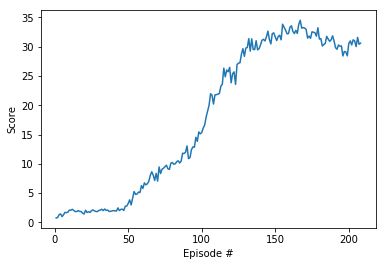

In [179]:
states = env_info.vector_observations
state_size = states.shape[1]
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
action_size = brain.vector_action_space_size
num_agents = 20
agents = Agent_Multi(state_size, action_size, random_seed = 1, prio = False, nb_agents = 20)

def ddpg_multiple(n_episodes = 1000, max_t = 1000000, print_every = 100):  
    
    scores_deque = deque(maxlen = print_every)
    scores = []
    env_info = env.reset(train_mode=True)[brain_name]                      
    
    for i_episode in range(1, n_episodes + 1):
        
        env_info = env.reset()[brain_name]                                   # reset the environment   
        states = env_info.vector_observations                                # get the current state (for each agent)
        episode_score = 0                                                    # initialize/reset the episode score
        t_step = 0                                                           # reset timestep
        
        for t in range(max_t):

            actions = agents.act(states)                                     # agent selects its action
            env_info = env.step(actions)[brain_name]                         # the action is passed to the environment
            next_states = env_info.vector_observations                       # get next states 
            rewards = env_info.rewards                                       # get rewards
            dones = env_info.local_done                                      # see if episode finished
            episode_score += np.mean(rewards)                                # update the score 
            iter_obj = zip(states, actions, rewards, next_states, dones)
            for state, action, reward, next_state, done in iter_obj:         # add next experience tuples to the buffer
                memory.add(state, action, reward, next_state, done)
            t_step += 1
            if t_step % LEARN_EVERY_T == 0:                                  # update model parameter during every 'LEARN_EVERY_T'
                if len(memory)>BATCH_SIZE:                                        # timesteps
                    experiences = memory.sample()
                    agents.learn(experiences, GAMMA)
            states = next_states                                             # next states becomes the current states
            if np.any(dones):                                                # exit loop if episode finished
                break       

        scores_deque.append(episode_score)
        scores.append(episode_score)
        print('Score (averaged over agents) episode {}: {:.2f}'.format(i_episode, episode_score))
        if i_episode % print_every == 0:
            print('\rRolling 100 Episode\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        if np.mean(scores_deque) >= 30:                                      # save models and break if environment solved
            print('Environment Solved in ', i_episode, ' episodes.')
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
    return scores

scores = ddpg_multiple()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores) + 1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

<div class="alert alert-block alert-info">
<b>Insights from training:</b> <br>
<br>
As seen in the above line chart, the agents successfully solve the environment after ~150 episodes.  In addition to the detailed learnings from section 7 involving the tuning of the hyperparameters, I also learned that the agents shouldn't necessarily update their model parameters after every time step as this results in the models becoming unstable.  If instead they learn every 4 or more time steps, training takes longer but they also remain stable for longer periods afterward.

</div>

### 10.  See the trained smart agents in action!

<br>
<br>
Run the below cell to see the intelligent agents in action.  Each green ball represents a moving target that each double-jointed arm (each arm being an agent) is trying to maintain contact with.
<br>
<br>
If your unity window closed from earlier, delete the comment '#' from the first line and run the entire cell.  If your unity window is still open, leave the first line commented-out and run.

In [16]:
#env = UnityEnvironment(file_name='Reacher_Windows_x86_64-multi/Reacher.exe')
agents = Agent_Multi(state_size, action_size, random_seed = 1, prio = False, nb_agents = 20)
agents.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agents.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
env_info = env.reset(train_mode=False)[brain_name]                    
states = env_info.vector_observations     
while True:
    actions = agents.act(states)     
    env_info = env.step(actions)[brain_name]         
    next_states = env_info.vector_observations
    rewards = env_info.rewards   
    dones = env_info.local_done
    states = next_states
    if np.any(dones):
        break
        


C:\Users\steph\Anaconda3-1\envs\DRL\lib\site-packages\torch\nn\functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


<div class="alert alert-block alert-info">
<b>Ideas for improvement:</b> <br>
<br>
This solution utilizes a DDPG framework.  PPO or other actor-critic frameworks could be applied and could potentially result in an improved solution.  Another idea is to implement learning rate decay, starting training with large learning rates which gradually decline as the agents train and eventually stablize with very low learning rate values.  Prioritized replay could also be applied to the critic network of the multi-agent solution, although I didn't see a huge increase in performance from this in the single agent scenario.  Double Q networks or other Q-network improvements could also be applied to the critic networks which could potentially improve performance.

</div>